<a href="https://colab.research.google.com/github/Gabriel-PC/UNINTER-Trabalho-Extensionista-II/blob/main/Atividade_Extensionista_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Trabalho Extensionista II** - UNINTER - 5050648
##Análise pública da previsão orçamentária das aposentadorias e seus desdobramentos.

*   Validação da Proposta


###Bibliotecas utilizadas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df_ProjAtuaPrevi = pd.read_excel('https://github.com/Gabriel-PC/UNINTER-Trabalho-Extensionista-II/raw/refs/heads/main/DADOS%20-%20Proje%C3%A7%C3%A3o%20Atuarial%20de%20Previd%C3%AAncia.xlsx')
df_RDPrevi = pd.read_excel('https://github.com/Gabriel-PC/UNINTER-Trabalho-Extensionista-II/raw/refs/heads/main/DADOS%20-%20Receitas%20e%20Despesas%20Previdenci%C3%A1rias.xlsx')
df_LOA = pd.read_excel('https://github.com/Gabriel-PC/UNINTER-Trabalho-Extensionista-II/raw/refs/heads/main/DADOS%20-%20LOA.xlsx')
df_ApoExpctVIDA = pd.read_excel('https://github.com/Gabriel-PC/UNINTER-Trabalho-Extensionista-II/raw/refs/heads/main/DADOS%20-%20Aposentadoria%20x%20Expectativa%20de%20Vida.xlsx')
df_ExpectVIDAnascer = pd.read_excel('https://github.com/Gabriel-PC/UNINTER-Trabalho-Extensionista-II/raw/refs/heads/main/DADOS%20-%20Expectativa%20de%20vida%20ao%20nascer.xlsx')

In [2]:
#atualizandos os arquivos de dados
#del df_ProjAtuaPrevi

###Verificando as colunas

In [3]:
list(df_ExpectVIDAnascer)

['ANO', 'Total', 'Homem', 'Mulher', 'Diferencial entre os sexos (anos)']

In [4]:
list(df_ApoExpctVIDA)

['Data', 'Teto em Reais', 'Observações']

In [5]:
list(df_RDPrevi)

['ANO',
 'TOTAL DAS RECEITAS PREVIDENCIÁRIAS - RPPS (III) = (I + II)',
 'RECEITAS REALIZADAS',
 'TOTAL DAS DESPESAS PREVIDENCIÁRIAS - RPPS (VI) = (IV + V)',
 'DESPESAS EXECUTADAS']

In [6]:
list(df_ProjAtuaPrevi)

['Exercício',
 'Receitas Previdenciárias  (a)',
 'Despesas Previdenciárias  (b)',
 'Resultado Previdenciário  c=(a-b)',
 'Saldo Financeiro do Exercício (d)=("d" exercicio anterior) + (c)',
 'Previsão - Exercício',
 'Previsão - Receitas Previdenciárias  (a)',
 'Previsão - Despesas Previdenciárias  (b)',
 'Previsão - Resultado Previdenciário  c=(a-b)',
 'Previsão - Saldo Financeiro do Exercício (d)=("d" exercicio anterior) + (c)']

In [7]:
list(df_LOA)

['LOA', 'DESPESAS\n1.2 - Por Função de Governo\n09 - Previdência Social']

###Verificando a consistência dos dados baixados

In [8]:
df_ProjAtuaPrevi #somente para visualizar

,Exercício,Receitas Previdenciárias (a),Despesas Previdenciárias (b),Resultado Previdenciário c=(a-b),"Saldo Financeiro do Exercício (d)=(""d"" exercicio anterior) + (c)",Previsão - Exercício,Previsão - Receitas Previdenciárias (a),Previsão - Despesas Previdenciárias (b),Previsão - Resultado Previdenciário c=(a-b),"Previsão - Saldo Financeiro do Exercício (d)=(""d"" exercicio anterior) + (c)"
0,2008,4.028338e+07,1.706568e+07,2.321771e+07,2.321771e+07,2009,4.046324e+07,2.698819e+07,1.347505e+07,3.669276e+07
1,2010,6.713137e+07,4.630119e+07,2.083018e+07,3.672439e+07,2011,7.457373e+07,4.214793e+07,3.242580e+07,6.915019e+07
2,2011,7.454373e+07,4.630119e+07,2.824254e+07,6.503694e+07,2012,6.990179e+07,5.610314e+07,1.379866e+07,7.883559e+07
3,2013,1.412521e+07,1.707070e+05,1.395451e+07,4.787996e+07,2014,1.349328e+07,3.351333e+05,1.315815e+07,6.103811e+07
4,2014,2.238348e+07,2.751569e+05,2.210832e+07,6.222759e+07,2015,2.127879e+07,6.886119e+05,2.059017e+07,8.281776e+07
5,2015,3.562324e+07,1.874638e+05,3.543577e+07,9.436390e+07,2016,3.387317e+07,3.478931e+05,3.352528e+07,1.278892e+08
6,2016,5.190820e+07,1.193721e+06,5.071448e+07,9.341298e+07,2017,6.125500e+07,1.095196e+06,6.015980e+07,1.535728e+08
7,2017,1.651604e+08,2.170919e+08,-5.193151e+07,6.937959e+07,2018,1.631798e+08,2.286852e+08,-6.550537e+07,3.874225e+06
8,2018,2.186315e+08,2.356027e+08,-1.697123e+07,3.562105e+07,2019,1.843962e+08,2.315563e+08,-4.716006e+07,-1.153902e+07
9,2019,1.596215e+08,2.688602e+08,-1.092387e+08,-9.363351e+07,2020,1.738306e+08,2.789832e+08,-1.051526e+08,-1.987861e+08


In [9]:
##Retirando linha de cálculo e fontes
df_ExpectVIDAnascer = df_ExpectVIDAnascer.drop([9,10], axis=0, inplace=False)

In [10]:
df_RDPrevi

,ANO,TOTAL DAS RECEITAS PREVIDENCIÁRIAS - RPPS (III) = (I + II),RECEITAS REALIZADAS,TOTAL DAS DESPESAS PREVIDENCIÁRIAS - RPPS (VI) = (IV + V),DESPESAS EXECUTADAS
0,2009,45051925,4.331486e+07,4.505192e+07,3.781134e+07
1,2011,78086100,8.553500e+07,6.055656e+07,5.505371e+07
2,2012,91622625,8.865146e+07,7.232299e+07,6.675292e+07
3,2017,241560603,1.324228e+08,2.284048e+08,1.935362e+08
4,2018,295896452,1.905392e+08,2.838437e+08,1.935362e+08
5,2019,312816848,2.414199e+08,3.057181e+08,2.594532e+08
6,2020,289528245,2.489533e+08,2.842369e+08,2.837720e+08
7,2021,357413598,3.040848e+08,3.438989e+08,3.079447e+08
8,2022,375316494,3.095108e+08,3.703778e+08,3.392784e+08
9,2023,500001304,3.400502e+08,4.759122e+08,2.824782e+08


In [11]:
df_LOA.columns = ['Ano LOA', 'Previsão LOA']

In [12]:
df_LOA

,Ano LOA,Previsão LOA
0,2016,228734383
1,2017,261245352
2,2018,321098622
3,2019,332411098


In [13]:
df_RDPrevi16a19 = df_RDPrevi[df_RDPrevi['ANO'].isin([2017, 2018, 2019, 2020])].reset_index(drop=True)

In [14]:
df_RDPrevi16a19

,ANO,TOTAL DAS RECEITAS PREVIDENCIÁRIAS - RPPS (III) = (I + II),RECEITAS REALIZADAS,TOTAL DAS DESPESAS PREVIDENCIÁRIAS - RPPS (VI) = (IV + V),DESPESAS EXECUTADAS
0,2017,241560603,1.324228e+08,2.284048e+08,1.935362e+08
1,2018,295896452,1.905392e+08,2.838437e+08,1.935362e+08
2,2019,312816848,2.414199e+08,3.057181e+08,2.594532e+08
3,2020,289528245,2.489533e+08,2.842369e+08,2.837720e+08


###Montando Gráficos - LOA x Despesas Executado

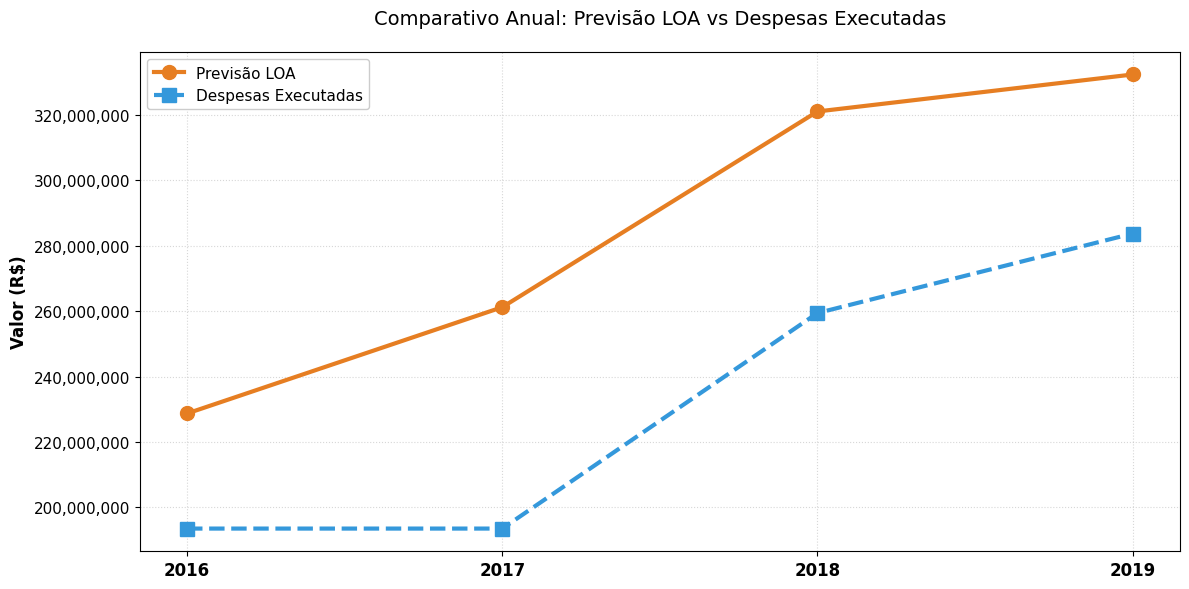

In [15]:
# Configurações iniciais
plt.figure(figsize=(12, 6), dpi=100)  # Reduzi um pouco o tamanho para 4 pontos

# Plotagem dos dados
df_LOA['Previsão LOA'].plot(label='Previsão LOA', color='#E67E22', linewidth=3, marker='o', markersize=10)
df_RDPrevi16a19['DESPESAS EXECUTADAS'].plot(label='Despesas Executadas', color='#3498DB', linewidth=3, linestyle='--', marker='s', markersize=10)

# --- PERSONALIZAÇÃO DO EIXO X ---
# Definindo os anos desejados
anos = [2016, 2017, 2018, 2019]

# Configurando os ticks e rótulos do eixo X
plt.xticks(
    ticks=range(len(anos)),  # Posições dos ticks (0 a 3 para 4 anos)
    labels=anos,             # Rótulos personalizados
    fontsize=12,
    fontweight='bold'
)

# --- MELHORIAS PARA O EIXO Y ---
plt.ylabel('Valor (R$)', fontsize=12, fontweight='bold')
plt.yticks(fontsize=11)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,.0f}".format(x)))

# Grade e legenda
plt.grid(True, linestyle=':', alpha=0.5)
plt.legend(fontsize=11, framealpha=1)

# Título
plt.title('Comparativo Anual: Previsão LOA vs Despesas Executadas', fontsize=14, pad=20)

plt.tight_layout()
plt.show()

###Projeções Atuariais - verificação das previsões ano a ano

In [16]:
list(df_ProjAtuaPrevi)

['Exercício',
 'Receitas Previdenciárias  (a)',
 'Despesas Previdenciárias  (b)',
 'Resultado Previdenciário  c=(a-b)',
 'Saldo Financeiro do Exercício (d)=("d" exercicio anterior) + (c)',
 'Previsão - Exercício',
 'Previsão - Receitas Previdenciárias  (a)',
 'Previsão - Despesas Previdenciárias  (b)',
 'Previsão - Resultado Previdenciário  c=(a-b)',
 'Previsão - Saldo Financeiro do Exercício (d)=("d" exercicio anterior) + (c)']

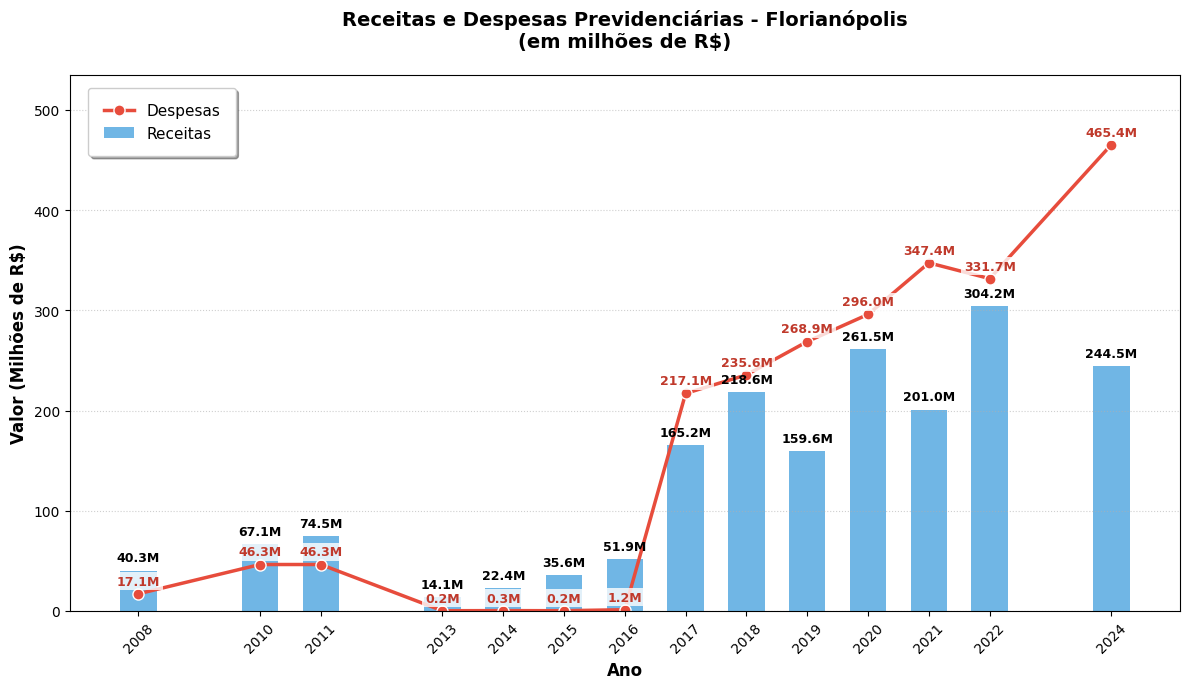

In [17]:
plt.figure(figsize=(12, 7))

# --- Dados em milhões ---
receitas = df_ProjAtuaPrevi['Receitas Previdenciárias  (a)'] / 1e6
despesas = df_ProjAtuaPrevi['Despesas Previdenciárias  (b)'] / 1e6
anos = df_ProjAtuaPrevi['Exercício']

# --- Gráfico combinado ---
# Barras para receitas (azul mais suave)
bars = plt.bar(anos, receitas,
               color='#3498db', alpha=0.7,
               width=0.6, label='Receitas')

# Linha para despesas (vermelho mais escuro)
line, = plt.plot(anos, despesas,
                 color='#e74c3c', marker='o', linewidth=2.5,
                 markersize=8, markeredgecolor='white',
                 label='Despesas')

# --- Anotações ---
# Valores das receitas (acima das barras)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + (max(receitas)*0.02),
             f'{height:.1f}M',
             ha='center', va='bottom', fontsize=9, fontweight='bold')

# Valores das despesas (com fundo branco)
for x, y in zip(anos, despesas):
    plt.text(x, y + (max(receitas)*0.02), f'{y:.1f}M',
             ha='center', va='bottom',
             fontsize=9, fontweight='bold', color='#c0392b',
             bbox=dict(facecolor='white', alpha=0.8,
                       edgecolor='none', pad=2))

# --- Configuração dos eixos ---
# Limites do eixo Y com margem de 15%
plt.ylim(0, max(max(receitas), max(despesas)) * 1.15)

# Formatação profissional
plt.ylabel('Valor (Milhões de R$)', fontsize=12, fontweight='bold')
plt.xlabel('Ano', fontsize=12, fontweight='bold')
plt.xticks(anos[::1], rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# --- Elementos do gráfico ---
plt.title('Receitas e Despesas Previdenciárias - Florianópolis\n(em milhões de R$)',
          fontsize=14, fontweight='bold', pad=20)

# Grade horizontal sutil
plt.grid(axis='y', linestyle=':', alpha=0.6)

# Legenda destacada
plt.legend(fontsize=11, framealpha=1,
           shadow=True, borderpad=1,
           bbox_to_anchor=(0.01, 0.99),
           loc='upper left')

plt.tight_layout()
plt.show()

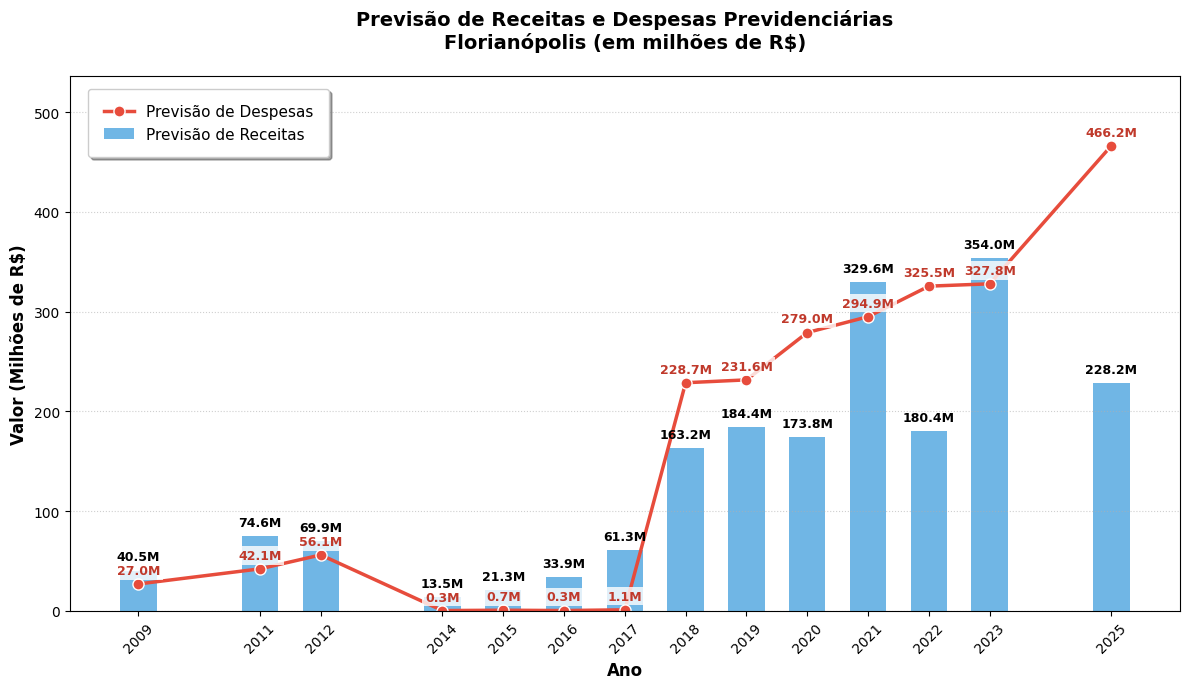

In [18]:
plt.figure(figsize=(12, 7))

# --- Dados em milhões ---
receitas = df_ProjAtuaPrevi['Previsão - Receitas Previdenciárias  (a)'] / 1e6
despesas = df_ProjAtuaPrevi['Previsão - Despesas Previdenciárias  (b)'] / 1e6
anos = df_ProjAtuaPrevi['Previsão - Exercício']

# --- Gráfico combinado ---
# Barras para receitas (azul mais profissional)
bars = plt.bar(anos, receitas,
               color='#3498db', alpha=0.7,
               width=0.6, label='Previsão de Receitas')

# Linha para despesas (vermelho mais intenso)
line, = plt.plot(anos, despesas,
                 color='#e74c3c', marker='o', linewidth=2.5,
                 markersize=8, markeredgecolor='white',
                 label='Previsão de Despesas')

# --- Anotações ---
# Valores das receitas (acima das barras)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + (max(receitas)*0.02),
             f'{height:.1f}M',
             ha='center', va='bottom', fontsize=9, fontweight='bold')

# Valores das despesas (com fundo branco)
for x, y in zip(anos, despesas):
    plt.text(x, y + (max(receitas)*0.02), f'{y:.1f}M',
             ha='center', va='bottom',
             fontsize=9, fontweight='bold', color='#c0392b',
             bbox=dict(facecolor='white', alpha=0.8,
                       edgecolor='none', pad=2))

# --- Configuração dos eixos ---
# Limites do eixo Y com 15% de margem
plt.ylim(0, max(max(receitas), max(despesas)) * 1.15)

# Formatação profissional
plt.ylabel('Valor (Milhões de R$)', fontsize=12, fontweight='bold')
plt.xlabel('Ano', fontsize=12, fontweight='bold')
plt.xticks(anos[::1], rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# --- Elementos do gráfico ---
plt.title('Previsão de Receitas e Despesas Previdenciárias\nFlorianópolis (em milhões de R$)',
          fontsize=14, fontweight='bold', pad=20)

# Grade horizontal sutil
plt.grid(axis='y', linestyle=':', alpha=0.6)

# Legenda destacada
plt.legend(fontsize=11, framealpha=1,
           shadow=True, borderpad=1,
           bbox_to_anchor=(0.01, 0.99),
           loc='upper left')

plt.tight_layout()
plt.show()

###Receitas e Despesas - Balanço Real x Previsões

In [19]:
list(df_RDPrevi)

['ANO',
 'TOTAL DAS RECEITAS PREVIDENCIÁRIAS - RPPS (III) = (I + II)',
 'RECEITAS REALIZADAS',
 'TOTAL DAS DESPESAS PREVIDENCIÁRIAS - RPPS (VI) = (IV + V)',
 'DESPESAS EXECUTADAS']

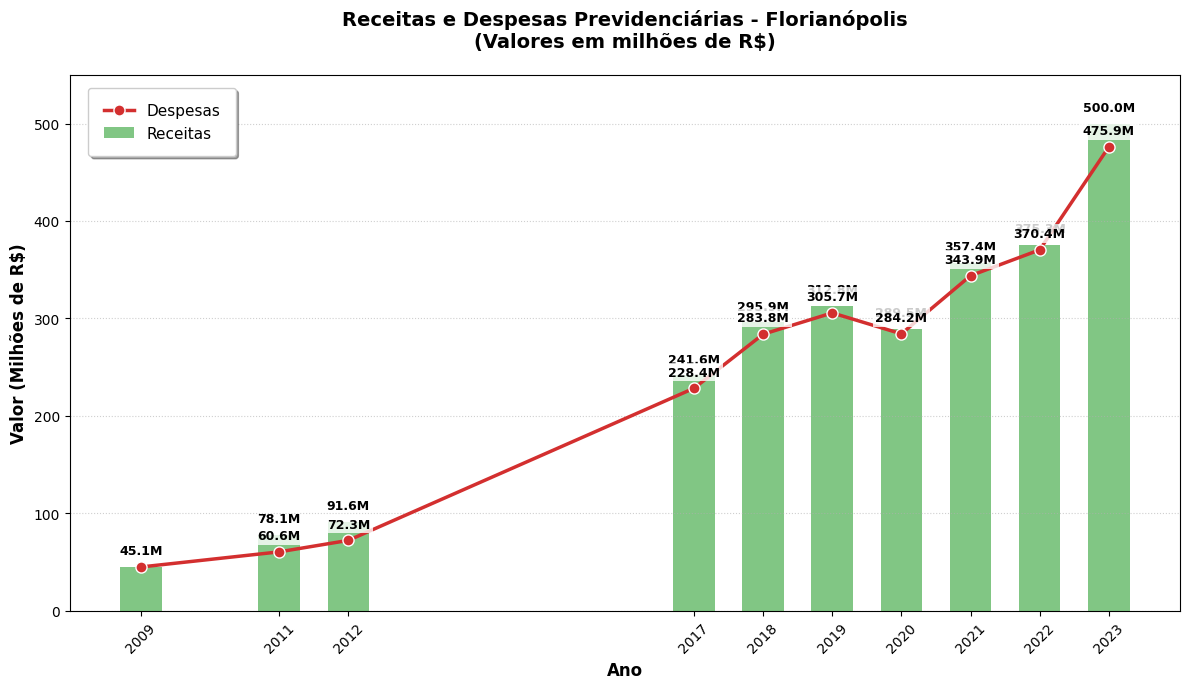

In [20]:
plt.figure(figsize=(12, 7))

# --- Dados em milhões ---
receitas = df_RDPrevi['TOTAL DAS RECEITAS PREVIDENCIÁRIAS - RPPS (III) = (I + II)'] / 1e6
despesas = df_RDPrevi['TOTAL DAS DESPESAS PREVIDENCIÁRIAS - RPPS (VI) = (IV + V)'] / 1e6

# --- Gráfico combinado ---
# Barras para receitas (verde mais suave)
bars = plt.bar(df_RDPrevi['ANO'], receitas,
               color='#4CAF50', alpha=0.7,
               width=0.6, label='Receitas')

# Linha para despesas (vermelho mais escuro)
line, = plt.plot(df_RDPrevi['ANO'], despesas,
                 color='#D32F2F', marker='o', linewidth=2.5,
                 markersize=8, markeredgecolor='white',
                 label='Despesas')

# --- Anotações ---
# Valores das receitas (centralizado acima das barras)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + (max(receitas)*0.02),
             f'{height:.1f}M',
             ha='center', va='bottom', fontsize=9, fontweight='bold')

# Valores das despesas (com fundo branco para melhor legibilidade)
for x, y in zip(df_RDPrevi['ANO'], despesas):
    plt.text(x, y + (max(receitas)*0.02), f'{y:.1f}M',
             ha='center', va='bottom',
             fontsize=9, fontweight='bold',
             bbox=dict(facecolor='white', alpha=0.8,
                       edgecolor='none', pad=2))

# --- Configuração dos eixos ---
# Limites do eixo Y com 10% de margem
plt.ylim(0, max(max(receitas), max(despesas)) * 1.10)

# Formatação profissional dos eixos
plt.ylabel('Valor (Milhões de R$)', fontsize=12, fontweight='bold')
plt.xlabel('Ano', fontsize=12, fontweight='bold')
plt.xticks(df_RDPrevi['ANO'][::1], rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# --- Elementos do gráfico ---
plt.title('Receitas e Despesas Previdenciárias - Florianópolis\n(Valores em milhões de R$)',
          fontsize=14, fontweight='bold', pad=20)

# Grade horizontal apenas
plt.grid(axis='y', linestyle=':', alpha=0.6)

# Legenda aprimorada
plt.legend(fontsize=11, framealpha=1,
           shadow=True, borderpad=1,
           bbox_to_anchor=(0.01, 0.99),
           loc='upper left')

plt.tight_layout()
plt.show()

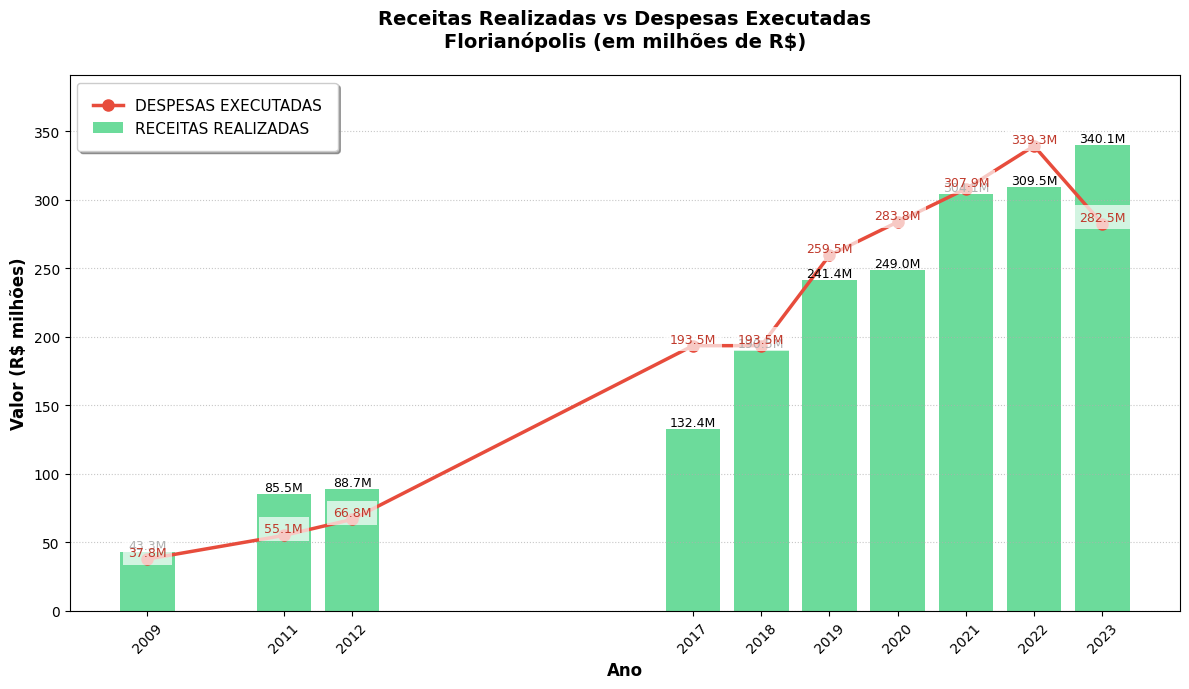

In [21]:
plt.figure(figsize=(12, 7))

# --- Dados em milhões ---
receitas = df_RDPrevi['RECEITAS REALIZADAS'] / 1e6
despesas = df_RDPrevi['DESPESAS EXECUTADAS'] / 1e6

# --- Gráfico combinado ---
# Barras para receitas
bars = plt.bar(df_RDPrevi['ANO'], receitas,
               color='#2ecc71', alpha=0.7,
               label='RECEITAS REALIZADAS')

# Linha para despesas
line, = plt.plot(df_RDPrevi['ANO'], despesas,
                 color='#e74c3c', marker='o', linewidth=2.5,
                 markersize=8, label='DESPESAS EXECUTADAS')

# --- Anotações ---
# Valores das receitas (barras)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:.1f}M',
             ha='center', va='bottom', fontsize=9)

# Valores das despesas (linha)
for x, y in zip(df_RDPrevi['ANO'], despesas):
    plt.text(x, y, f'{y:.1f}M',
             ha='center', va='bottom',
             color='#c0392b', fontsize=9,
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# --- Configuração dos eixos ---
# Ajuste automático dos limites
data_max = max(max(receitas), max(despesas))
plt.ylim(0, data_max * 1.15)  # 15% de margem

# Formatação dos eixos
plt.ylabel('Valor (R$ milhões)', fontsize=12, fontweight='bold')
plt.xlabel('Ano', fontsize=12, fontweight='bold')
plt.xticks(df_RDPrevi['ANO'][::1], rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# --- Elementos do gráfico ---
plt.title('Receitas Realizadas vs Despesas Executadas\nFlorianópolis (em milhões de R$)',
          fontsize=14, fontweight='bold', pad=20)

plt.grid(axis='y', linestyle=':', alpha=0.7)

# Legenda aprimorada
plt.legend(fontsize=11, framealpha=1,
           shadow=True, borderpad=1)

plt.tight_layout()
plt.show()

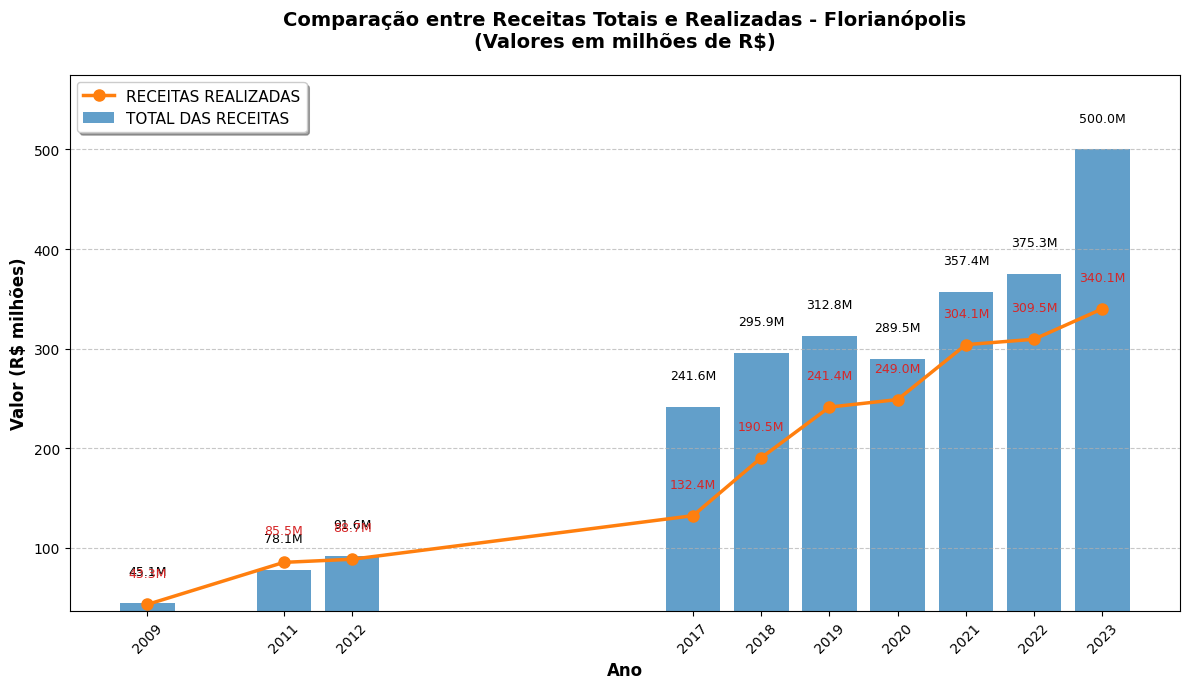

In [22]:
plt.figure(figsize=(12, 7))

# --- Dados em milhões ---
receitas_totais = df_RDPrevi['TOTAL DAS RECEITAS PREVIDENCIÁRIAS - RPPS (III) = (I + II)'] / 1e6
receitas_realizadas = df_RDPrevi['RECEITAS REALIZADAS'] / 1e6

# --- Gráfico combinado ---
# Barras para receitas totais
bars = plt.bar(df_RDPrevi['ANO'],
               receitas_totais,
               color='#1f77b4', alpha=0.7, label='TOTAL DAS RECEITAS')

# Linha para receitas realizadas (mesmo eixo Y)
line = plt.plot(df_RDPrevi['ANO'],
               receitas_realizadas,
               color='#ff7f0e', marker='o', linestyle='-', linewidth=2.5,
               markersize=8, label='RECEITAS REALIZADAS')

# --- Anotações ---
# Para barras (valores totais)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.05*max(receitas_totais),
             f'{height:.1f}M',
             ha='center', va='bottom', fontsize=9)

# Para linha (valores realizados)
for x, y in zip(df_RDPrevi['ANO'], receitas_realizadas):
    plt.text(x, y + 0.05*max(receitas_totais),
             f'{y:.1f}M',
             ha='center', va='bottom', color='#d62728', fontsize=9)

# --- Configuração do eixo Y ---
# Ajuste automático dos limites
margin = 0.15  # Margem de 15%
y_min = min(min(receitas_totais), min(receitas_realizadas)) * (1 - margin)
y_max = max(max(receitas_totais), max(receitas_realizadas)) * (1 + margin)
plt.ylim(y_min, y_max)

# --- Formatação profissional ---
plt.title('Comparação entre Receitas Totais e Realizadas - Florianópolis\n(Valores em milhões de R$)',
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Ano', fontsize=12, fontweight='bold')
plt.ylabel('Valor (R$ milhões)', fontsize=12, fontweight='bold')

# Eixo X
plt.xticks(df_RDPrevi['ANO'][::1], rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Grade
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Legenda
plt.legend(fontsize=11, framealpha=1, shadow=True)

# Ajuste final
plt.tight_layout()
plt.show()

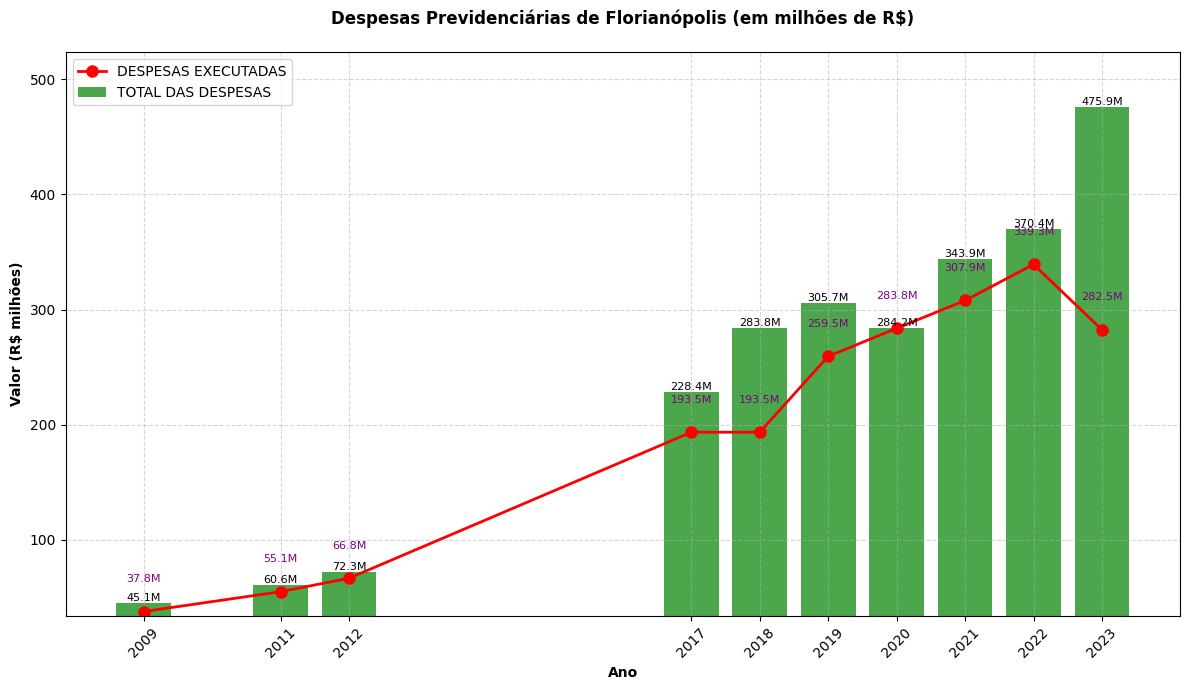

In [23]:
plt.figure(figsize=(12, 7))

# --- Dados em milhões ---
despesas_totais = df_RDPrevi['TOTAL DAS DESPESAS PREVIDENCIÁRIAS - RPPS (VI) = (IV + V)'] / 1e6
despesas_executadas = df_RDPrevi['DESPESAS EXECUTADAS'] / 1e6

# --- Gráfico combinado ---
# Barras para despesas totais
bars = plt.bar(df_RDPrevi['ANO'],
               despesas_totais,
               color='green', alpha=0.7, label='TOTAL DAS DESPESAS')

# Linha para despesas executadas (mesmo eixo Y)
line, = plt.plot(df_RDPrevi['ANO'],
                 despesas_executadas,
                 color='red', marker='o', linewidth=2, markersize=8,
                 label='DESPESAS EXECUTADAS')

# --- Anotações ---
# Para barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height,
             f'{height:.1f}M',
             ha='center', va='bottom', color='black', fontsize=8)

# Para linha
for x, y in zip(df_RDPrevi['ANO'], despesas_executadas):
    plt.text(x, y + 0.05 * max(despesas_totais),  # Desloca um pouco para cima
             f'{y:.1f}M',
             ha='center', va='bottom', color='purple', fontsize=8)

# --- Configuração do eixo Y único ---
# Define limites para incluir ambos os conjuntos
y_min = min(min(despesas_totais), min(despesas_executadas)) * 0.9
y_max = max(max(despesas_totais), max(despesas_executadas)) * 1.1
plt.ylim(y_min, y_max)

# --- Formatação ---
plt.title('Despesas Previdenciárias de Florianópolis (em milhões de R$)', fontweight='bold', pad=20)
plt.xlabel('Ano', fontweight='bold')
plt.ylabel('Valor (R$ milhões)', fontweight='bold')

# Eixo X
plt.xticks(df_RDPrevi['ANO'][::1], rotation=45)

# Legenda
plt.legend(loc='upper left')

# Grade
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

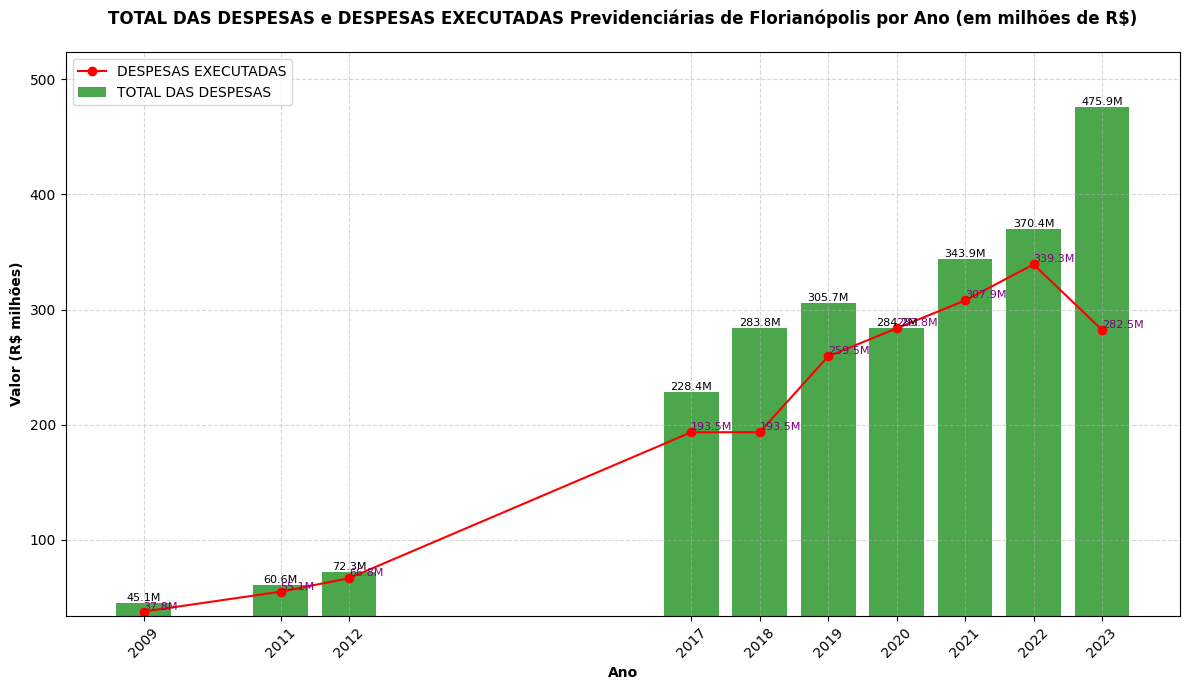

In [24]:
plt.figure(figsize=(12, 7))

# --- Dados em milhões ---
despesas_totais = df_RDPrevi['TOTAL DAS DESPESAS PREVIDENCIÁRIAS - RPPS (VI) = (IV + V)'] / 1e6
despesas_executadas = df_RDPrevi['DESPESAS EXECUTADAS'] / 1e6

# --- Gráfico 1: Despesas Totais (barras) ---
bars = plt.bar(df_RDPrevi['ANO'],
               despesas_totais,
               color='green', alpha=0.7, label='TOTAL DAS DESPESAS')

# Anotações (valores em milhões)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height,
             f'{height:.1f}M',
             ha='center', va='bottom', color='black', fontsize=8)

# --- Gráfico 2: Despesas Executadas (linha no mesmo eixo Y) ---
line, = plt.plot(df_RDPrevi['ANO'],
                 despesas_executadas,
                 color='red', marker='o', label='DESPESAS EXECUTADAS')

# Anotações (valores em milhões)
for x, y in zip(df_RDPrevi['ANO'], despesas_executadas):
    plt.text(x, y, f'{y:.1f}M',
             ha='left', va='bottom', color='purple', fontsize=8)

# --- Ajuste do eixo Y único ---
# Define os limites do eixo Y para acomodar ambos os gráficos
y_min = min(min(despesas_totais), min(despesas_executadas)) * 0.9  # Margem de 10%
y_max = max(max(despesas_totais), max(despesas_executadas)) * 1.1
plt.ylim(y_min, y_max)

# --- Formatação do gráfico ---
plt.title('TOTAL DAS DESPESAS e DESPESAS EXECUTADAS Previdenciárias de Florianópolis por Ano (em milhões de R$)', fontweight='bold', pad=20)
plt.xlabel('Ano', fontweight='bold')
plt.ylabel('Valor (R$ milhões)', fontweight='bold')  # Eixo Y único

# Ajusta os ticks do eixo X
plt.xticks(df_RDPrevi['ANO'][::1], rotation=45)

# Legenda
plt.legend(loc='upper left')

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

###Comparativos - Previsão Atuarial x Balanço

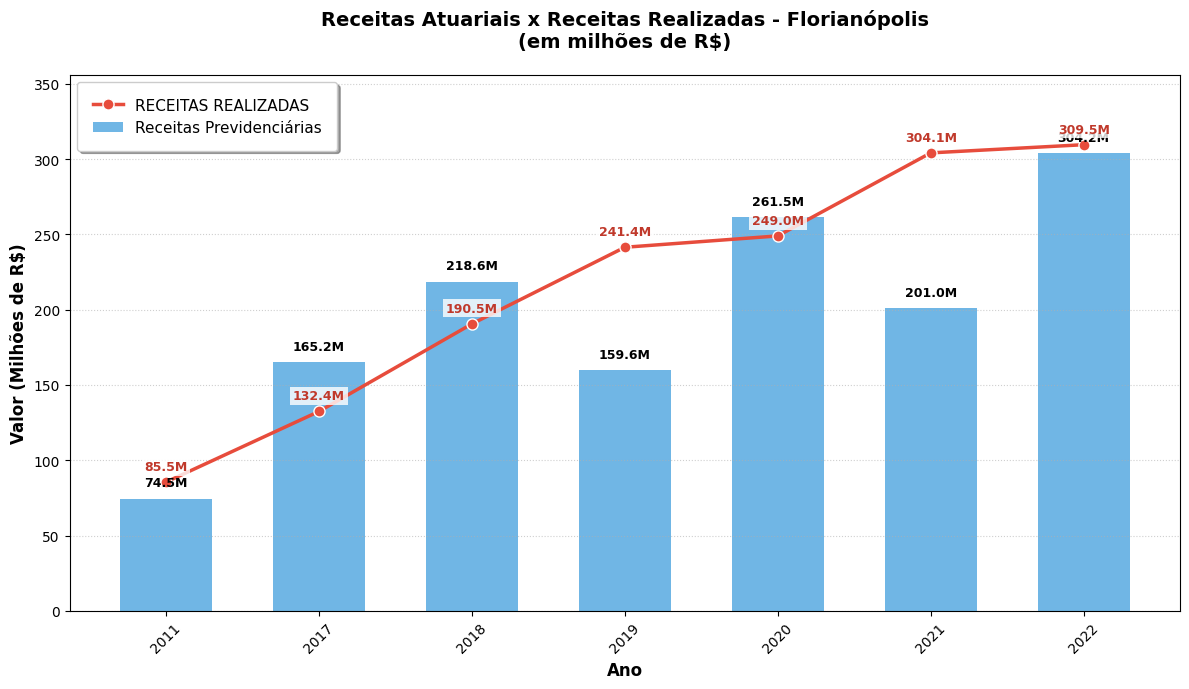

In [25]:
plt.figure(figsize=(12, 7))

# --- Dados em milhões ---
# Converter para séries temporais com anos como índice
receitas_series = df_ProjAtuaPrevi.set_index('Exercício')['Receitas Previdenciárias  (a)'] / 1e6
despesas_series = df_RDPrevi.set_index('ANO')['RECEITAS REALIZADAS'] / 1e6

# Juntar as séries em um único DataFrame para alinhar os anos
df_combined = pd.DataFrame({
    'Receitas Previdenciárias': receitas_series,
    'RECEITAS REALIZADAS': despesas_series
})

# Remover linhas com valores NaN (onde não há dados para ambos)
df_combined = df_combined.dropna()

# Extrair os dados alinhados
anos = df_combined.index
receitas = df_combined['Receitas Previdenciárias']
despesas = df_combined['RECEITAS REALIZADAS']

# --- Gráfico combinado ---
# Barras para receitas
bars = plt.bar(anos.astype(str), receitas,  # Convertendo anos para string
               color='#3498db', alpha=0.7,
               width=0.6, label='Receitas Previdenciárias')

# Linha para despesas
line, = plt.plot(anos.astype(str), despesas,
                 color='#e74c3c', marker='o', linewidth=2.5,
                 markersize=8, markeredgecolor='white',
                 label='RECEITAS REALIZADAS')

# --- Anotações ---
# Valores das receitas
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + (max(receitas)*0.02),
             f'{height:.1f}M',
             ha='center', va='bottom', fontsize=9, fontweight='bold')

# Valores das despesas
for x, y in zip(range(len(anos)), despesas):
    plt.text(x, y + (max(receitas)*0.02), f'{y:.1f}M',
             ha='center', va='bottom',
             fontsize=9, fontweight='bold', color='#c0392b',
             bbox=dict(facecolor='white', alpha=0.8,
                       edgecolor='none', pad=2))

# --- Configuração dos eixos ---
plt.ylim(0, max(max(receitas), max(despesas)) * 1.15)
plt.ylabel('Valor (Milhões de R$)', fontsize=12, fontweight='bold')
plt.xlabel('Ano', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# --- Elementos do gráfico ---
plt.title('Receitas Atuariais x Receitas Realizadas - Florianópolis\n(em milhões de R$)',
          fontsize=14, fontweight='bold', pad=20)
plt.grid(axis='y', linestyle=':', alpha=0.6)
plt.legend(fontsize=11, framealpha=1, shadow=True, borderpad=1)

plt.tight_layout()
plt.show()

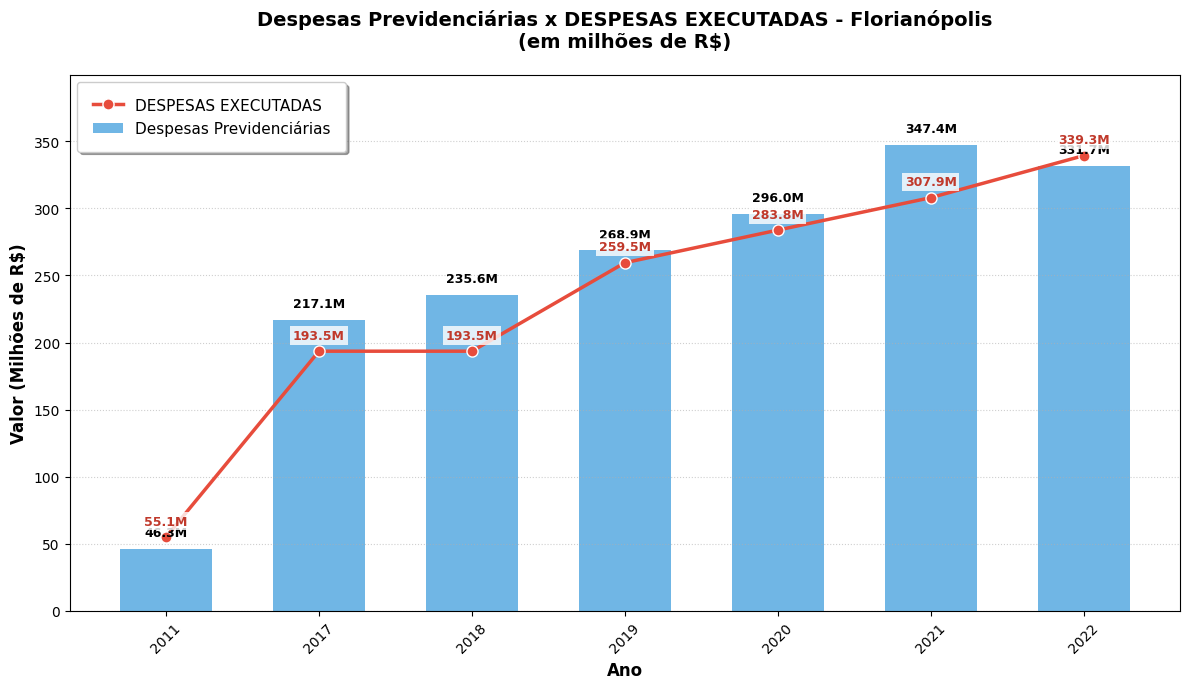

In [26]:
plt.figure(figsize=(12, 7))

# --- Dados em milhões ---
# Converter para séries temporais com anos como índice
receitas_series = df_ProjAtuaPrevi.set_index('Exercício')['Despesas Previdenciárias  (b)'] / 1e6
despesas_series = df_RDPrevi.set_index('ANO')['DESPESAS EXECUTADAS'] / 1e6

# Juntar as séries em um único DataFrame para alinhar os anos
df_combined = pd.DataFrame({
    'Despesas Previdenciárias': receitas_series,
    'DESPESAS EXECUTADAS': despesas_series
})

# Remover linhas com valores NaN (onde não há dados para ambos)
df_combined = df_combined.dropna()

# Extrair os dados alinhados
anos = df_combined.index
receitas = df_combined['Despesas Previdenciárias']
despesas = df_combined['DESPESAS EXECUTADAS']

# --- Gráfico combinado ---
# Barras para receitas
bars = plt.bar(anos.astype(str), receitas,  # Convertendo anos para string
               color='#3498db', alpha=0.7,
               width=0.6, label='Despesas Previdenciárias')

# Linha para despesas
line, = plt.plot(anos.astype(str), despesas,
                 color='#e74c3c', marker='o', linewidth=2.5,
                 markersize=8, markeredgecolor='white',
                 label='DESPESAS EXECUTADAS')

# --- Anotações ---
# Valores das receitas
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + (max(receitas)*0.02),
             f'{height:.1f}M',
             ha='center', va='bottom', fontsize=9, fontweight='bold')

# Valores das despesas
for x, y in zip(range(len(anos)), despesas):
    plt.text(x, y + (max(receitas)*0.02), f'{y:.1f}M',
             ha='center', va='bottom',
             fontsize=9, fontweight='bold', color='#c0392b',
             bbox=dict(facecolor='white', alpha=0.8,
                       edgecolor='none', pad=2))

# --- Configuração dos eixos ---
plt.ylim(0, max(max(receitas), max(despesas)) * 1.15)
plt.ylabel('Valor (Milhões de R$)', fontsize=12, fontweight='bold')
plt.xlabel('Ano', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# --- Elementos do gráfico ---
plt.title('Despesas Previdenciárias x DESPESAS EXECUTADAS - Florianópolis\n(em milhões de R$)',
          fontsize=14, fontweight='bold', pad=20)
plt.grid(axis='y', linestyle=':', alpha=0.6)
plt.legend(fontsize=11, framealpha=1, shadow=True, borderpad=1)

plt.tight_layout()
plt.show()

###Cálculo dos Erros Associados as projeções

In [27]:
# Filtrar apenas os anos presentes em ambos os DataFrames
anos_comuns = set(df_ProjAtuaPrevi['Exercício']).intersection(set(df_RDPrevi['ANO']))
df_prev_filtrado = df_ProjAtuaPrevi[df_ProjAtuaPrevi['Exercício'].isin(anos_comuns)]
df_real_filtrado = df_RDPrevi[df_RDPrevi['ANO'].isin(anos_comuns)]

# Mesclar os DataFrames para comparar previsão x realizado
df_comparacao = pd.merge(
    df_prev_filtrado,
    df_real_filtrado,
    left_on='Exercício',
    right_on='ANO'
).drop(columns=['ANO'])  # Remover coluna duplicada

In [29]:
# Calcular erro absoluto e percentual
df_comparacao['Erro Absoluto (EA)'] = abs(df_comparacao['Receitas Previdenciárias  (a)'] - df_comparacao['RECEITAS REALIZADAS'])
df_comparacao['Erro Percentual (EP)'] = (df_comparacao['Erro Absoluto (EA)'] / df_comparacao['RECEITAS REALIZADAS']) * 100

# Arredondar para 2 casas decimais
df_comparacao = df_comparacao.round(2)

ERRO MÉDIO

In [30]:
# Métricas de erro
mae = df_comparacao['Erro Absoluto (EA)'].mean()
mape = df_comparacao['Erro Percentual (EP)'].mean()

print(f"MAE (Erro Absoluto Médio): {mae:,.2f}")
print(f"MAPE (Erro Percentual Médio): {mape:.2f}%")

MAE (Erro Absoluto Médio): 39,230,894.90
MAPE (Erro Percentual Médio): 18.12%


In [32]:
print("\nTabela de Comparação:")
print(df_comparacao[['Exercício', 'Receitas Previdenciárias  (a)', 'RECEITAS REALIZADAS', 'Erro Absoluto (EA)', 'Erro Percentual (EP)']])


Tabela de Comparação:
   Exercício  Receitas Previdenciárias  (a)  RECEITAS REALIZADAS  \
0       2011                   7.454373e+07         8.553500e+07   
1       2017                   1.651604e+08         1.324228e+08   
2       2018                   2.186315e+08         1.905392e+08   
3       2019                   1.596215e+08         2.414199e+08   
4       2020                   2.615390e+08         2.489533e+08   
5       2021                   2.010186e+08         3.040848e+08   
6       2022                   3.041659e+08         3.095108e+08   

   Erro Absoluto (EA)  Erro Percentual (EP)  
0        1.099127e+07                 12.85  
1        3.273762e+07                 24.72  
2        2.809226e+07                 14.74  
3        8.179836e+07                 33.88  
4        1.258571e+07                  5.06  
5        1.030662e+08                 33.89  
6        5.344905e+06                  1.73  


ERRO (EM MILHÕES) DO VALOR REAL

In [33]:
rmse = np.sqrt((df_comparacao['Erro Absoluto (EA)']**2).mean())
print(f"RMSE: {rmse:,.2f}")

RMSE: 52,755,913.94


In [36]:
# Calcular erro absoluto e percentual
df_comparacao['Erro Absoluto (EA)'] = abs(df_comparacao['Despesas Previdenciárias  (b)'] - df_comparacao['DESPESAS EXECUTADAS'])
df_comparacao['Erro Percentual (EP)'] = (df_comparacao['Erro Absoluto (EA)'] / df_comparacao['DESPESAS EXECUTADAS']) * 100

# Arredondar para 2 casas decimais
df_comparacao = df_comparacao.round(2)

In [37]:
# Métricas de erro
mae = df_comparacao['Erro Absoluto (EA)'].mean()
mape = df_comparacao['Erro Percentual (EP)'].mean()

print(f"MAE (Erro Absoluto Médio): {mae:,.2f}")
print(f"MAPE (Erro Percentual Médio): {mape:.2f}%")

MAE (Erro Absoluto Médio): 20,434,222.85
MAPE (Erro Percentual Médio): 10.40%


In [38]:
print("\nTabela de Comparação:")
print(df_comparacao[['Exercício', 'Despesas Previdenciárias  (b)', 'DESPESAS EXECUTADAS', 'Erro Absoluto (EA)', 'Erro Percentual (EP)']])


Tabela de Comparação:
   Exercício  Despesas Previdenciárias  (b)  DESPESAS EXECUTADAS  \
0       2011                   4.630119e+07         5.505371e+07   
1       2017                   2.170919e+08         1.935362e+08   
2       2018                   2.356027e+08         1.935362e+08   
3       2019                   2.688602e+08         2.594532e+08   
4       2020                   2.959667e+08         2.837720e+08   
5       2021                   3.474182e+08         3.079447e+08   
6       2022                   3.316888e+08         3.392784e+08   

   Erro Absoluto (EA)  Erro Percentual (EP)  
0          8752525.72                 15.90  
1         23555691.73                 12.17  
2         42066499.91                 21.74  
3          9407034.14                  3.63  
4         12194694.97                  4.30  
5         39473572.13                 12.82  
6          7589541.32                  2.24  


In [39]:
rmse = np.sqrt((df_comparacao['Erro Absoluto (EA)']**2).mean())
print(f"RMSE: {rmse:,.2f}")

RMSE: 24,651,962.09


###Calculando ERROS de Receitas x Despesas

In [41]:
df_RDPrevi['RESULTADO_FISCAL'] = df_RDPrevi['RECEITAS REALIZADAS'] - df_RDPrevi['DESPESAS EXECUTADAS']
df_RDPrevi['ERRO_RESULTADO'] = df_RDPrevi['RESULTADO_FISCAL']  # Quanto acima ou abaixo de zero
df_RDPrevi['ERRO_PERCENTUAL'] = (df_RDPrevi['ERRO_RESULTADO'] / df_RDPrevi['DESPESAS EXECUTADAS']) * 100

In [42]:
media_resultado = df_RDPrevi['RESULTADO_FISCAL'].mean()
print(f"Média do Resultado Fiscal: {media_resultado:,.2f}")
mae = np.mean(np.abs(df_RDPrevi['ERRO_RESULTADO']))
print(f"MAE (Erro Absoluto Médio): {mae:,.2f}")
mape = np.mean(np.abs(df_RDPrevi['ERRO_PERCENTUAL']))
print(f"MAPE (Erro Percentual Médio): {mape:.2f}%")


Média do Resultado Fiscal: -3,513,455.13
MAE (Erro Absoluto Médio): 26,604,531.93
MAPE (Erro Percentual Médio): 18.55%


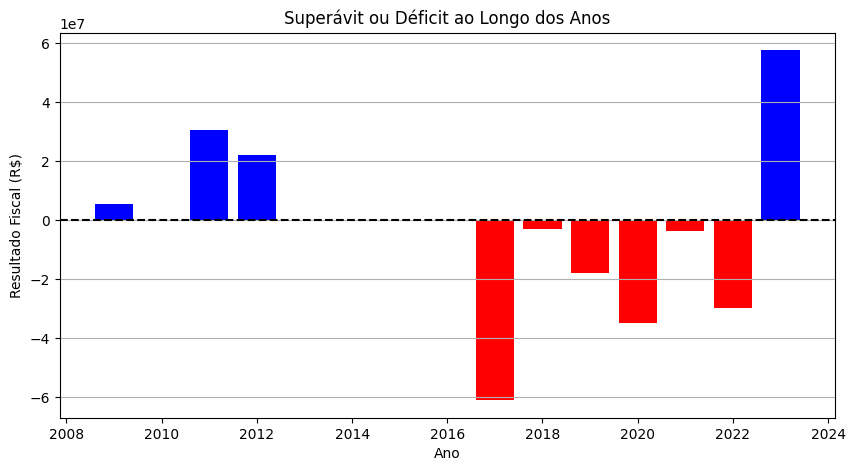

In [44]:
plt.figure(figsize=(10, 5))
plt.bar(df_RDPrevi['ANO'], df_RDPrevi['RESULTADO_FISCAL'], color=np.where(df_RDPrevi['RESULTADO_FISCAL'] >= 0, 'blue', 'red'))
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Ano')
plt.ylabel('Resultado Fiscal (R$)')
plt.title('Superávit ou Déficit ao Longo dos Anos')
plt.grid(axis='y')
plt.show()

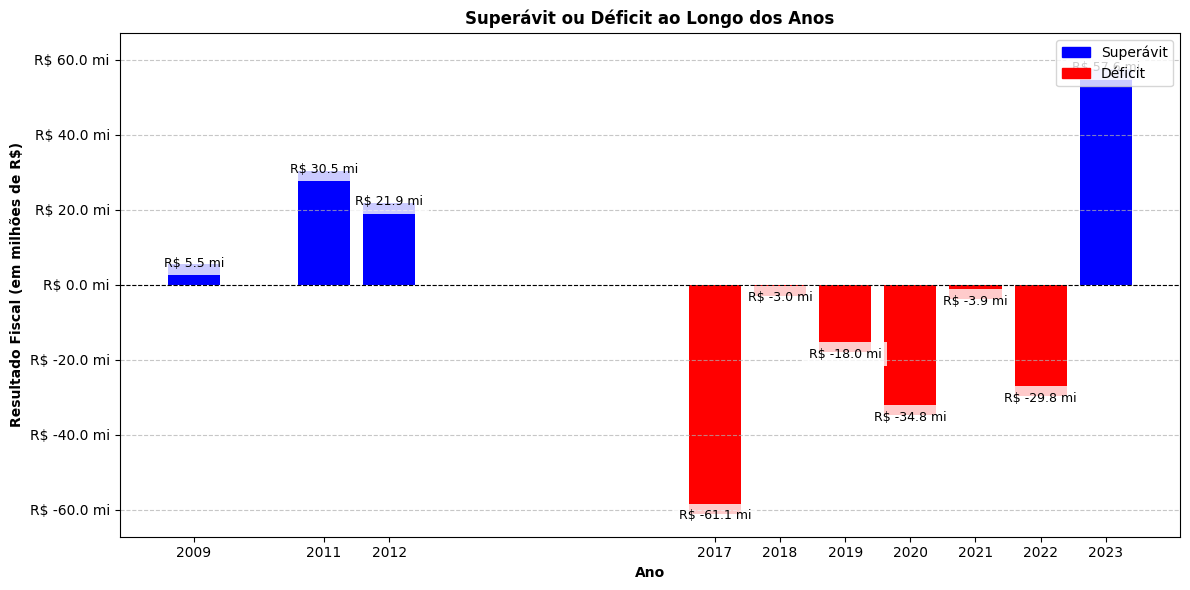

In [47]:
# Dados
anos = df_RDPrevi['ANO']
resultados = df_RDPrevi['RESULTADO_FISCAL'] / 1e6  # Converter para milhões (opcional)

# Criar gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(anos, resultados, color=np.where(resultados >= 0, 'blue', 'red'))

# Adicionar valores nas barras (agora em milhões)
for bar in bars:
    height = bar.get_height()
    offset = 0.3 if height >= 0 else -0.5  # Ajuste o offset conforme necessário
    plt.text(
        bar.get_x() + bar.get_width() / 2.,
        height + offset,
        f'R$ {height:,.1f} mi',  # Formato: R$ X.X mi
        ha='center',
        va='center',
        fontsize=9,
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none')
    )

# Linha de referência (zero)
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)

# Ajustar escala do eixo Y
max_val = max(np.abs(resultados)) * 1.1  # Margem de 10% acima do maior valor
plt.ylim(-max_val, max_val)

# Formatando eixo Y para mostrar em milhões
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'R$ {x:,.1f} mi'))

# Personalizações
plt.xlabel('Ano', fontweight='bold')
plt.ylabel('Resultado Fiscal (em milhões de R$)', fontweight='bold')
plt.title('Superávit ou Déficit ao Longo dos Anos', fontweight='bold')
plt.xticks(anos)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Legenda
plt.legend(
    handles=[
        plt.Rectangle((0, 0), 1, 1, color='blue', label='Superávit'),
        plt.Rectangle((0, 0), 1, 1, color='red', label='Déficit')
    ],
    loc='upper right'
)

plt.tight_layout()
plt.show()

###Ajustando as Receitas em 30% (supondo a extinção da DRU)

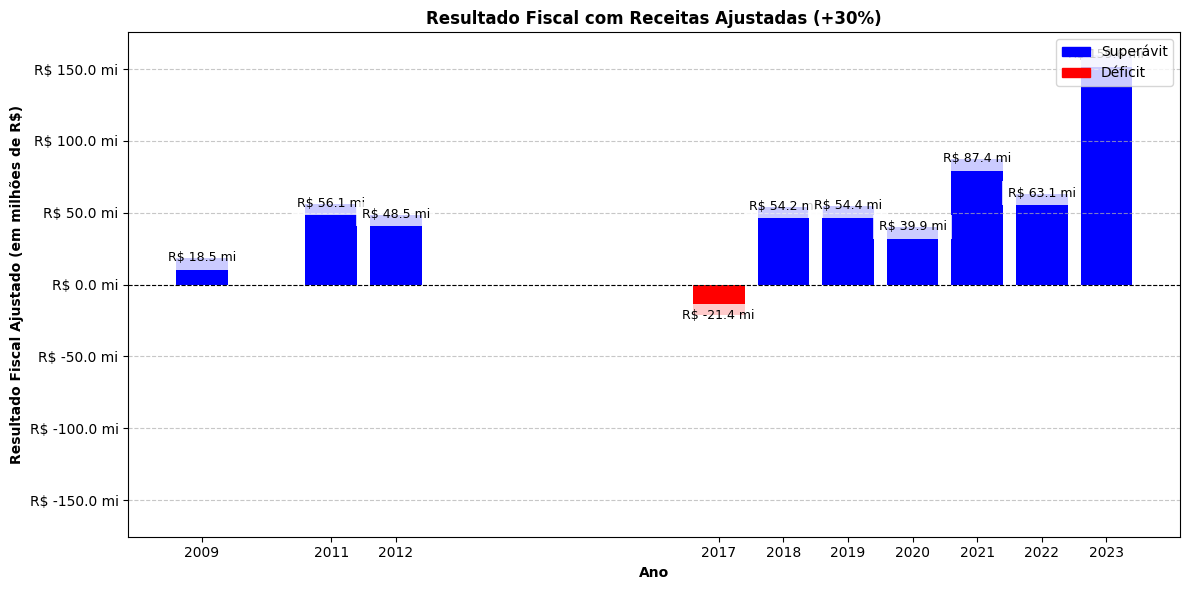


Tabela de Resultados Ajustados:
    ANO  RECEITAS REALIZADAS  RECEITAS_AJUSTADAS  DESPESAS EXECUTADAS  \
0  2009         4.331486e+07        5.630932e+07         3.781134e+07   
1  2011         8.553500e+07        1.111955e+08         5.505371e+07   
2  2012         8.865146e+07        1.152469e+08         6.675292e+07   
3  2017         1.324228e+08        1.721496e+08         1.935362e+08   
4  2018         1.905392e+08        2.477010e+08         1.935362e+08   
5  2019         2.414199e+08        3.138458e+08         2.594532e+08   
6  2020         2.489533e+08        3.236393e+08         2.837720e+08   
7  2021         3.040848e+08        3.953102e+08         3.079447e+08   
8  2022         3.095108e+08        4.023640e+08         3.392784e+08   
9  2023         3.400502e+08        4.420653e+08         2.824782e+08   

   RESULTADO_FISCAL_AJUSTADO  
0               1.849798e+07  
1               5.614179e+07  
2               4.849398e+07  
3              -2.138660e+07  
4       

In [48]:
# PASSO 1: Repor os 30% nas receitas
df_RDPrevi['RECEITAS_AJUSTADAS'] = df_RDPrevi['RECEITAS REALIZADAS'] * 1.3

# PASSO 2: Recalcular o Resultado Fiscal
df_RDPrevi['RESULTADO_FISCAL_AJUSTADO'] = df_RDPrevi['RECEITAS_AJUSTADAS'] - df_RDPrevi['DESPESAS EXECUTADAS']

# PASSO 3: Plotar o gráfico
anos = df_RDPrevi['ANO']
resultados = df_RDPrevi['RESULTADO_FISCAL_AJUSTADO'] / 1e6  # Converter para milhões (opcional)

plt.figure(figsize=(12, 6))
bars = plt.bar(anos, resultados, color=np.where(resultados >= 0, 'blue', 'red'))

# Adicionar valores nas barras
for bar in bars:
    height = bar.get_height()
    offset = 0.3 if height >= 0 else -0.5
    plt.text(
        bar.get_x() + bar.get_width() / 2.,
        height + offset,
        f'R$ {height:,.1f} mi',
        ha='center',
        va='center',
        fontsize=9,
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none')
    )

# Linha de referência (zero)
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)

# Ajustar escala do eixo Y
max_val = max(np.abs(resultados)) * 1.1
plt.ylim(-max_val, max_val)

# Formatando eixo Y
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'R$ {x:,.1f} mi'))

# Títulos e legendas
plt.xlabel('Ano', fontweight='bold')
plt.ylabel('Resultado Fiscal Ajustado (em milhões de R$)', fontweight='bold')
plt.title('Resultado Fiscal com Receitas Ajustadas (+30%)', fontweight='bold')
plt.xticks(anos)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Legenda de cores
plt.legend(
    handles=[
        plt.Rectangle((0, 0), 1, 1, color='blue', label='Superávit'),
        plt.Rectangle((0, 0), 1, 1, color='red', label='Déficit')
    ],
    loc='upper right'
)

plt.tight_layout()
plt.show()

# Exibir tabela com resultados
print("\nTabela de Resultados Ajustados:")
print(df_RDPrevi[['ANO', 'RECEITAS REALIZADAS', 'RECEITAS_AJUSTADAS', 'DESPESAS EXECUTADAS', 'RESULTADO_FISCAL_AJUSTADO']].round(2))